# References
1. DataCamp tutorial on [employee_churn](https://www.datacamp.com/community/tutorials/predicting-employee-churn-python)      
2. Working with widgets [widgets_tutorial](https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916)      

In [21]:
# imports
import os
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [36]:
# settings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
#print all rows of a df in ipython shell 
#pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)

%matplotlib inline

In [ ]:
# getting help

# help(plt.hist)
# help(plt.legend)


In [ ]:
# Binder upload
# 1. goto mybinder.com
# 2. add the github repository link, branch, filename, requirements.txt should be filled with dependencies
# 3. remove path from read_csv
# 4. share the link

# Data preparation 

In [2]:
path = os.path.abspath(os.getcwd())
datadir = 'data'
full_path = os.path.join(path, datadir)

hr_file = os.path.join(full_path, "HR_comma_sep.csv")

# Case study 1 :: employee churn (supervised leraning, xgboost)

## Load data, head, tail

In [4]:
## load data
data = pd.read_csv(hr_file)

In [5]:
# head
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# tail
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


## Feature names, datatypes

In [7]:
# Feature names, datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Data insights

In [11]:
# data insights
left = data.groupby('left').mean()
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Summary statistics

In [12]:
# summary statistics
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Visualisation

### Employees left

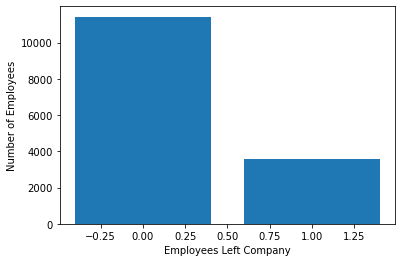

In [13]:
# employee left

left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [14]:
# value_counts() 
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
### Number of Projects

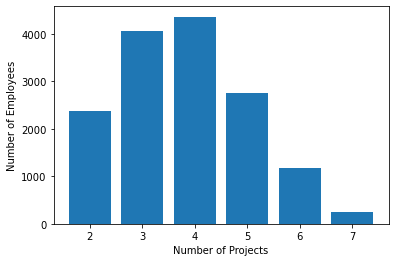

In [15]:
# nr of projects
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

### Time Spent in Company

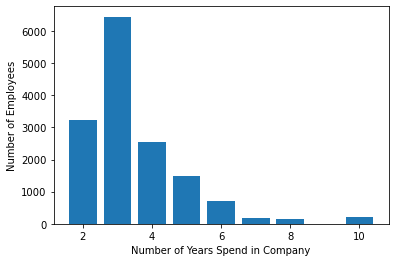

In [16]:
# time spent in company
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

## Subplots using Seaborn

### Counts by features category

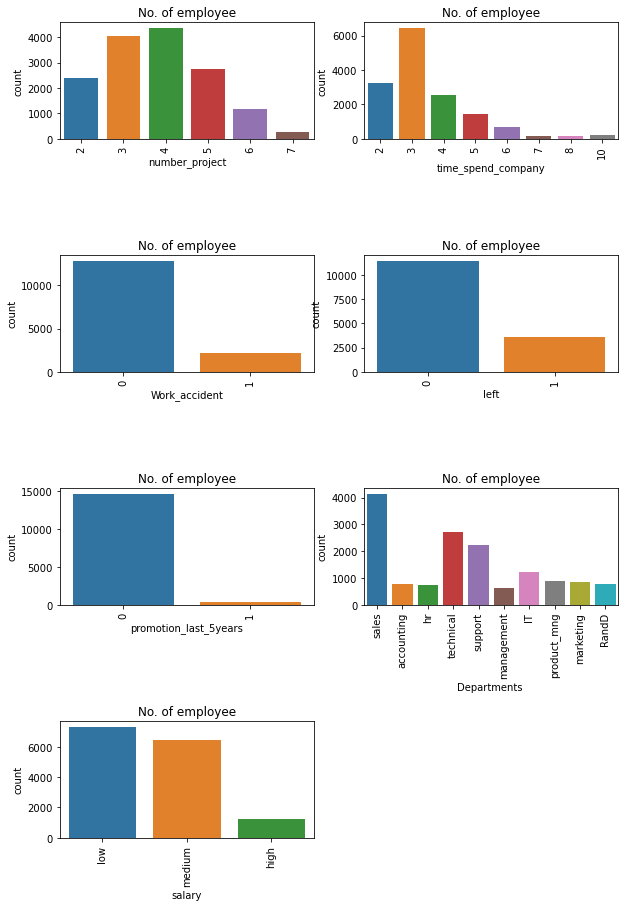

In [17]:
# Counts by features category
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

### Counts by features category by (hue) left

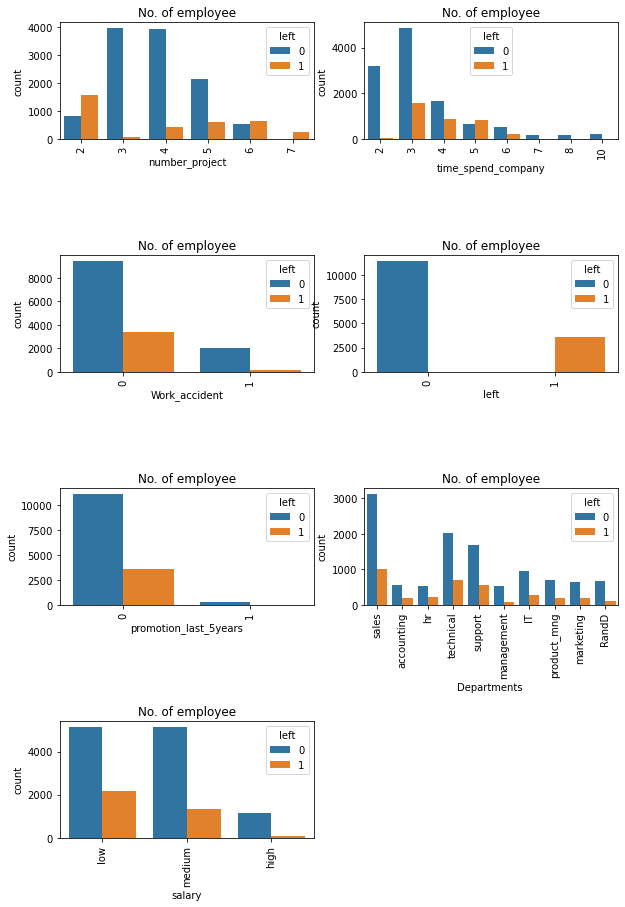

In [18]:
# Counts by features category by (hue) left

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Cluster analysis

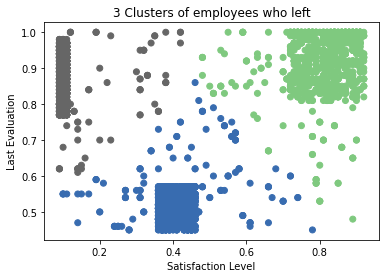

In [20]:
# cluster analysis

# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

# Working with widgets

## Getting started

### Setting up and display

In [2]:
# definition of widgets
widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Slider:',
    value=3
)

IntSlider(value=3, description='Slider:', max=10)

In [8]:
# display widgets

slider = widgets.IntSlider()
display(slider)
slider.value =7

IntSlider(value=0)

In [9]:
slider.value 

7

### Linking two widgets

In [10]:
# Linking two widgets
slider = widgets.IntSlider()
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

IntSlider(value=0)

IntText(value=0)

Link(source=(IntSlider(value=0), 'value'), target=(IntText(value=0), 'value'))

### Widget list

In [11]:
# documentation
print(dir(widgets))

['Accordion', 'AppLayout', 'Audio', 'BoundedFloatText', 'BoundedIntText', 'Box', 'Button', 'ButtonStyle', 'CallbackDispatcher', 'Checkbox', 'Color', 'ColorPicker', 'Combobox', 'Controller', 'CoreWidget', 'DOMWidget', 'DatePicker', 'Datetime', 'Dropdown', 'FileUpload', 'FloatLogSlider', 'FloatProgress', 'FloatRangeSlider', 'FloatSlider', 'FloatText', 'GridBox', 'GridspecLayout', 'HBox', 'HTML', 'HTMLMath', 'Image', 'IntProgress', 'IntRangeSlider', 'IntSlider', 'IntText', 'Label', 'Layout', 'NumberFormat', 'Output', 'Password', 'Play', 'RadioButtons', 'Select', 'SelectMultiple', 'SelectionRangeSlider', 'SelectionSlider', 'SliderStyle', 'Style', 'Tab', 'Text', 'Textarea', 'ToggleButton', 'ToggleButtons', 'ToggleButtonsStyle', 'TwoByTwoLayout', 'VBox', 'Valid', 'ValueWidget', 'Video', 'Widget', '__builtins__', '__cached__', '__doc__', '__file__', '__jupyter_widgets_base_version__', '__jupyter_widgets_controls_version__', '__loader__', '__name__', '__package__', '__path__', '__protocol_vers

### Handling Widget Events

In [40]:
# DOES NOT WORK
# click on a button
btn = widgets.Button(description='Medium')
display(btn)

# define eventhandler
def btn_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))

# assign the eventhandlet to the buttons click method
btn.on_click(btn_eventhandler)

Button(description='Medium', style=ButtonStyle())

### Controlling widget output

In [25]:
# load a df
url = "https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv"
df_london = pd.read_csv(url, encoding = 'unicode_escape')

In [26]:
df_london.head()

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


In [41]:
# dropdown to filter df by year and display the results in the output widget
ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.year))

output_year = widgets.Output()

def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        if (change.new == ALL):
            display(df_london)
        else:
            display(df_london[df_london.year == change.new])
        
dropdown_year.observe(dropdown_year_eventhandler, names='value')

display(dropdown_year)
display(output_year)


Dropdown(options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012…

### Linking Widget Outputs

In [ ]:
# dropdowns to filter df by year and purpose and display the results in the output widget

# define output widget
output = widgets.Output()

# define dropdowns
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.year))
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.purpose))

# common filtering to apply for dropdowns
def common_filtering(year, purpose):
    output.clear_output()
    
    if (year == ALL) & (purpose == ALL):
        common_filter = df_london
    elif (year == ALL):
        common_filter = df_london[df_london.purpose == purpose]
    elif (purpose == ALL):
        common_filter = df_london[df_london.year == year]
    else:
        common_filter = df_london[(df_london.year == year) & 
                                  (df_london.purpose == purpose)]
    
    with output:
        display(common_filter)

# define the eventhandler for dropdown_year
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value)

# define the eventhandler for dropdown_purpose
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new)
    
# bind the handlers to the dropdowns
dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')

# display the input widgets
display(dropdown_year)
display(dropdown_purpose)
# display the output
display(output)

## Creating a dashboard

### Colouring the critical values

In [ ]:
# dropdowns to filter df by year and purpose and display the results in the output widget and colour the critical values

# define output widget
output = widgets.Output()

# define the numeric widget
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5, step=1)

# define dropdowns
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.year))
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.purpose))

# colouring to apply
def colour_ge_value(value, comparison):
    if value >= comparison:
        return 'color: red'
    else:
        return 'color: black'
    
# common filtering to apply for dropdowns
def common_filtering(year, purpose, num):
    output.clear_output()
    
    if (year == ALL) & (purpose == ALL):
        common_filter = df_london
    elif (year == ALL):
        common_filter = df_london[df_london.purpose == purpose]
    elif (purpose == ALL):
        common_filter = df_london[df_london.year == year]
    else:
        common_filter = df_london[(df_london.year == year) & 
                                  (df_london.purpose == purpose)]
    
    with output:
        display(common_filter
                .style.applymap(
                    lambda x: colour_ge_value(x, num),
                    subset=['Visits (000s)', 'Spend (£m)', 'Nights (000s)']))
        
# define the eventhandler for dropdown_year
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value, bounded_num.value)

# define the eventhandler for dropdown_purpose
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new, bounded_num.value)

# define the eventhandler for numeric widget
def bounded_num_eventhandler(change):
    common_filtering(dropdown_year.value, dropdown_purpose.value, 
                     change.new)
# bind the handlers to the dropdowns
dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')
bounded_num.observe(bounded_num_eventhandler, names='value')

# display the input widgets
display(dropdown_year)
display(dropdown_purpose)
display(bounded_num)

# display the output
#display(output)

In [ ]:
# display the output
display(output)

### Adding plots

In [59]:
# dropdowns to filter df by year and purpose, colour the critical values, add a plot, display the output 

# define output widget
output = widgets.Output()

# define output widget for plot
plot_output = widgets.Output()

# define the numeric widget
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5, step=1, description='Number: ')

# define dropdowns
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.year), description='Year: ')
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.purpose), description='Purpose: ')

# colouring to apply
def colour_ge_value(value, comparison):
    if value >= comparison:
        return 'color: red'
    else:
        return 'color: black'
    
# common filtering to apply for dropdowns
def common_filtering(year, purpose, num):
    output.clear_output()
    plot_output.clear_output()
    
    if (year == ALL) & (purpose == ALL):
        common_filter = df_london
    elif (year == ALL):
        common_filter = df_london[df_london.purpose == purpose]
    elif (purpose == ALL):
        common_filter = df_london[df_london.year == year]
    else:
        common_filter = df_london[(df_london.year == year) & 
                                  (df_london.purpose == purpose)]
    
    with output:
        display(common_filter
                .style.applymap(
                    lambda x: colour_ge_value(x, num),
                    subset=['Visits (000s)', 'Spend (£m)', 'Nights (000s)']))
    with plot_output:
        sns.kdeplot(common_filter['Visits (000s)'], shade=True)
        plt.show()
        
# define the eventhandler for dropdown_year
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value, bounded_num.value)

# define the eventhandler for dropdown_purpose
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new, bounded_num.value)

# define the eventhandler for numeric widget
def bounded_num_eventhandler(change):
    common_filtering(dropdown_year.value, dropdown_purpose.value, 
                     change.new)
# bind the handlers to the dropdowns
dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')
bounded_num.observe(bounded_num_eventhandler, names='value')

# display the input widgets
display(dropdown_year)
display(dropdown_purpose)
display(bounded_num)

# display the output
#display(output)
#display(plot_output)

Dropdown(description='Year: ', options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',…

Dropdown(description='Purpose: ', options=('ALL', 'Business', 'Holiday', 'Miscellaneous', 'Study', 'VFR'), val…

BoundedFloatText(value=5.0, description='Number: ', max=100000.0, step=1.0)

In [ ]:
# display the output
display(plot_output)
display(output)

## Dashboard Layout

In [64]:
# add a layout to the dashboard

# define a layout
item_layout = widgets.Layout(margin='0 0 50px 0')

# define output widget
output = widgets.Output()

# define output widget for plot
plot_output = widgets.Output()

# create a tab for the outputs
tab = widgets.Tab([output, plot_output], layout=item_layout)
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'KDE Plot')

# define the numeric widget
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5, step=1, description='Number: ')

# define dropdowns
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.year), description='Year: ')
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.purpose), description='Purpose: ')

# arrange input widgets horizontally
input_widgets = widgets.HBox([dropdown_year, dropdown_purpose, bounded_num], layout=item_layout)

# stack the input widgets and the tab on top of each other
dashboard = widgets.VBox([input_widgets, tab])

# colouring to apply
def colour_ge_value(value, comparison):
    if value >= comparison:
        return 'color: red'
    else:
        return 'color: black'
    
# common filtering to apply for dropdowns
def common_filtering(year, purpose, num):
    output.clear_output()
    plot_output.clear_output()
    
    if (year == ALL) & (purpose == ALL):
        common_filter = df_london
    elif (year == ALL):
        common_filter = df_london[df_london.purpose == purpose]
    elif (purpose == ALL):
        common_filter = df_london[df_london.year == year]
    else:
        common_filter = df_london[(df_london.year == year) & 
                                  (df_london.purpose == purpose)]
    
    with output:
        display(common_filter
                .style.applymap(
                    lambda x: colour_ge_value(x, num),
                    subset=['Visits (000s)', 'Spend (£m)', 'Nights (000s)']))
    with plot_output:
        sns.kdeplot(common_filter['Visits (000s)'], shade=True)
        plt.show()
        
# define the eventhandler for dropdown_year
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value, bounded_num.value)

# define the eventhandler for dropdown_purpose
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new, bounded_num.value)

# define the eventhandler for numeric widget
def bounded_num_eventhandler(change):
    common_filtering(dropdown_year.value, dropdown_purpose.value, 
                     change.new)
# bind the handlers to the dropdowns
dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')
bounded_num.observe(bounded_num_eventhandler, names='value')

# display dashboard
display(dashboard)

In [ ]:
# display(tab)